In [2]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import random

# P vs NP

In [3]:
%%timeit -o
n = 10
l1 = [i for i in range(n)]
random.shuffle(l1)
# sort numbers
for i in range(n-1):
    for j in range(i+1,n):
        if l1[i]>l1[j]:
            tmp = l1[j]
            l1[j] = l1[i]
            l1[i] = tmp

22.1 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<TimeitResult : 22.1 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)>

In [4]:
def sort_numbers(n):
    l1 = [i for i in range(n)]
    random.shuffle(l1)
    # sort numbers
    for i in range(n-1):
        for j in range(i+1,n):
            if l1[i]>l1[j]:
                tmp = l1[j]
                l1[j] = l1[i]
                l1[i] = tmp

In [5]:
res = []
y = []
x = [10,50,100,200,500,1000]
for n in x:
    a = %timeit -o sort_numbers(n)
    res.append(a)
    y = y + [np.mean(a.timings)]

21.5 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
236 µs ± 4.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
841 µs ± 56.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.93 ms ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.7 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
80.6 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
max(y)

0.080589987028572

Text(0, 0.5, 'compute time in ms')

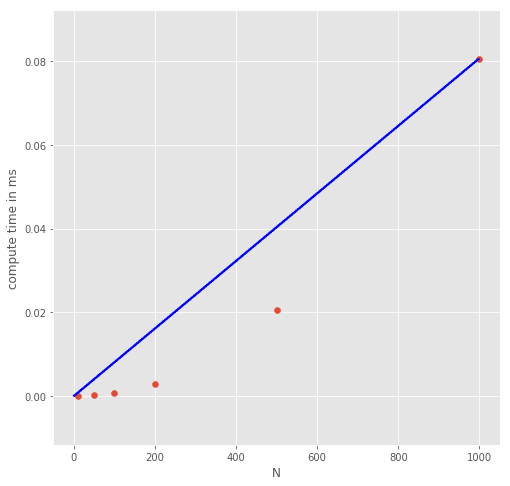

In [7]:
fig = plt.figure(figsize = (8,8))
plt.scatter(x,y)
x2 = [i for i in range(max(x))]
y2 = [i^2 for i in x2]
norm = max(y)/max(y2)
y2 = [i*norm for i in y2]

plt.plot(x2,y2,color = 'blue')
plt.xlabel('N')
plt.ylabel('compute time in ms')